# Table of Content #

*   **Installing important Libraries**
* **Inspecting the data set for Minor corrections(Data Cleaning )**
* **EDA**
* **Exploratory data analysis**
* **Feature Engineering**
* **Modelling**



**Insalling important library**

In [7]:
!pip install pandas --quiet
!pip install numpy --quiet
!pip install -U scikit-learn --quiet
!pip install xgboost --quiet
!pip install matplotlib --quiet
!pip install plotly --quiet
!pip install seaborn --quiet
!pip install opendatasets --quiet

In [8]:
import os
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.subplots as make_subplots
import plotly.graph_objects as go
import warnings


In [9]:
health_care_df=pd.read_csv('/Users/harshjaiswal/Desktop/Git/Stroke-Predictions/healthcare-dataset-stroke-data.csv')

**Inspecting the data set for Minor corrections(Data Cleaning )**

In [10]:
health_care_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Converting age to Integer data type**

In [11]:
health_care_df['age']=health_care_df['age'].astype(np.int64)

In [12]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [13]:
health_care_df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
evermarried=health_care_df['ever_married'].value_counts()
worktype=health_care_df['work_type'].value_counts()
residence_type=health_care_df['Residence_type'].value_counts()
smoking_status=health_care_df['smoking_status'].value_counts()

# **Exploratory data analysis**

**General distribution of categoriacal data**

In [15]:
px.pie(labels=evermarried,values= [i for i in health_care_df['ever_married'].value_counts()],
       names=['Married','Single'],title='Married vs single')

In [16]:
px.pie(labels=worktype.index, values=[i for i in health_care_df['work_type'].value_counts()],
       names=['private','Self-employed','children','Govt_job','Never_worked'],title='Distribution of work type')

/Users/harshjaiswal/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [17]:

px.pie(labels=residence_type,values=[x for x in health_care_df['Residence_type'].value_counts()],
       names=['Urban','Rural'],title='Distribution of Residence type')

In [18]:
px.pie(labels=smoking_status, values=[x for x in health_care_df['smoking_status'].value_counts()],
       names=['never smoked','Unknown','formerly smoked','smokes'],title='Distribution of smoking status')

In [19]:
px.pie(labels=np.array(health_care_df.stroke.value_counts()),values=[x for x in health_care_df.stroke.value_counts()],
       names=['NO','Yes'], title=' Distribution of strokes')

In [20]:
px.histogram(health_care_df.age,nbins=39,color=health_care_df.stroke,title='Distribution of Age vs stroke')

/var/folders/g_/4y5h37m96h7gb1f4w331kclw0000gn/T/ipykernel_67334/1980620428.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



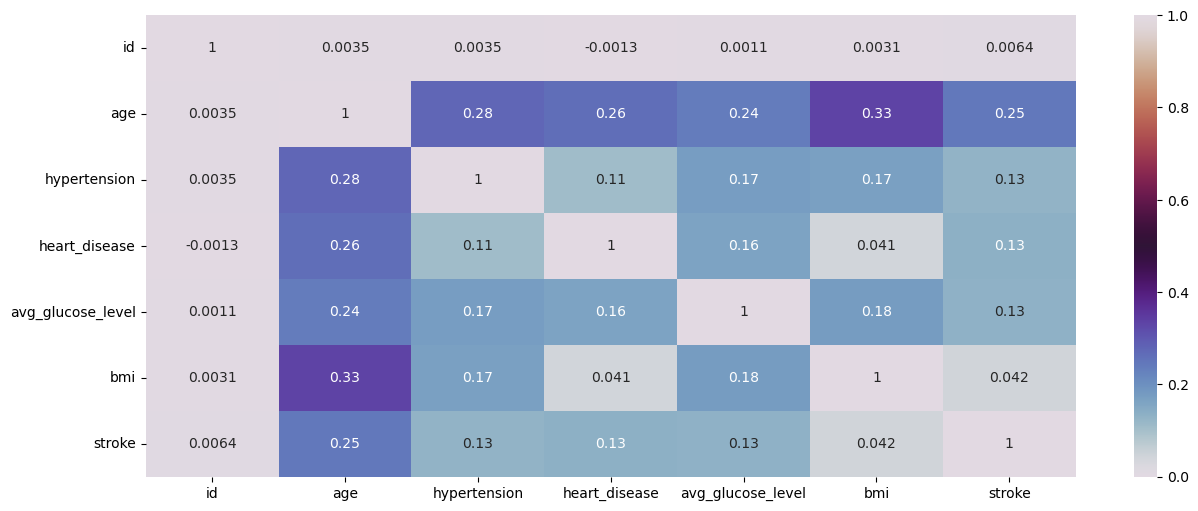

In [21]:
plt.figure(figsize=(15,6))
cormat=health_care_df.corr()
sns.heatmap(cormat,annot=True,cmap="twilight");

In [22]:
px.histogram(health_care_df.avg_glucose_level,color=health_care_df.stroke,title='Distribution of avg-glucose level with respect to stroke')

**Relation between age with respect to stroke**

plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
plt.title('Age with respect to stroke')
sns.countplot(health_care_df.age,hue=health_care_df.stroke);
plt.xticks(rotation=90);

# Feature Engineering

In [23]:
input_cols=health_care_df.columns[1:-1]

In [24]:
input_cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [25]:
target_cols=health_care_df.columns[-1]

In [26]:
target_cols

'stroke'

In [27]:
input_df=health_care_df[input_cols]
input_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [28]:
numeric_cols=input_df.select_dtypes(['int64','float64']).columns
numeric_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [29]:
categorical_cols=input_df.select_dtypes(['object']).columns
categorical_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [30]:
health_care_df.isna().sum().sort_values(ascending=False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [31]:
from sklearn.impute import SimpleImputer


In [32]:
imputer=SimpleImputer(strategy='mean')
imputer.fit(input_df[numeric_cols])


SimpleImputer()

In [33]:
input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])

/var/folders/g_/4y5h37m96h7gb1f4w331kclw0000gn/T/ipykernel_67334/3299223154.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
input_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [59]:
import sklearn; print(sklearn.__version__)

1.4.1.post1


In [35]:
from sklearn.preprocessing import OneHotEncoder


In [62]:
encoder= OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(input_df[categorical_cols])

In [63]:
encoder

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [64]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [65]:
encoded_cols

['gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [66]:

input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

/var/folders/g_/4y5h37m96h7gb1f4w331kclw0000gn/T/ipykernel_67334/3574594701.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
Scaler= MinMaxScaler()

In [69]:
Scaler.fit(input_df[numeric_cols])

MinMaxScaler()

In [70]:
input_df[numeric_cols]=Scaler.transform(input_df[numeric_cols])

In [71]:
input_df.isna().sum().sort_values(ascending=False)


gender                            0
age                               0
smoking_status_never smoked       0
smoking_status_formerly smoked    0
smoking_status_Unknown            0
Residence_type_Urban              0
Residence_type_Rural              0
work_type_children                0
work_type_Self-employed           0
work_type_Private                 0
work_type_Never_worked            0
work_type_Govt_job                0
ever_married_Yes                  0
ever_married_No                   0
gender_Other                      0
gender_Male                       0
gender_Female                     0
smoking_status                    0
bmi                               0
avg_glucose_level                 0
Residence_type                    0
work_type                         0
ever_married                      0
heart_disease                     0
hypertension                      0
smoking_status_smokes             0
dtype: int64

In [72]:
input_df.drop(categorical_cols,axis=1,inplace=True)


In [73]:
input_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.817073,0.0,1.0,0.801265,0.301260,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.743902,0.0,0.0,0.679023,0.212981,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975610,0.0,1.0,0.234512,0.254296,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.597561,0.0,0.0,0.536008,0.276060,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.963415,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975610,1.0,0.0,0.132167,0.212981,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,0.987805,0.0,0.0,0.323516,0.340206,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,0.426829,0.0,0.0,0.128658,0.232532,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.621951,0.0,0.0,0.513203,0.175258,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [74]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets= train_test_split(input_df,health_care_df[target_cols],
                                                                     test_size=0.25,random_state=42)

In [75]:
train_inputs

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4505,0.731707,1.0,0.0,0.828086,0.382589,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3576,0.500000,0.0,0.0,0.133183,0.208477,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3032,0.634146,0.0,0.0,0.149525,0.231386,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1867,0.670732,0.0,0.0,0.038547,0.200458,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
494,0.670732,0.0,0.0,0.258840,0.336770,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.524390,0.0,0.0,0.151787,0.232532,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
466,0.743902,1.0,0.0,0.530560,0.571592,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3092,0.012195,0.0,0.0,0.194627,0.085911,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3772,0.975610,0.0,0.0,0.650725,0.237113,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [76]:
train_targets

4505    0
3576    0
3032    0
1867    0
494     0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 3832, dtype: int64

# Modeling 
**Trying out different Algorithm to minimise the loss value and increase the accuracy score**

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

* **Decision Tree**

In [78]:
model=DecisionTreeClassifier(random_state=42)

In [79]:
model.fit(train_inputs,train_targets)

DecisionTreeClassifier(random_state=42)

In [80]:
train_predictions=model.predict(train_inputs)

In [81]:
train_rmse_error= mean_squared_error(train_predictions,train_targets,squared=False)

/Users/harshjaiswal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [82]:
print('The RMSE error for train preds {}'.format(train_rmse_error))

The RMSE error for train preds 0.0


In [83]:
val_pred=model.predict(val_inputs)

In [84]:
val_rmse_error=mean_squared_error(val_pred,val_targets)

In [85]:
print(' The RMSE error for val preds{}'.format(val_rmse_error))

 The RMSE error for val preds0.10328638497652583


In [86]:
model1=DecisionTreeClassifier(random_state=42,max_depth=50,max_leaf_nodes=140)
model1.fit(train_inputs,train_targets)
train1_predictions=model.predict(train_inputs)
val1_pred=model.predict(val_inputs)
val1_rmse_error=mean_squared_error(val1_pred,val_targets)
print(' The RMSE error for val1 preds{}'.format(val1_rmse_error))

 The RMSE error for val1 preds0.10328638497652583


In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(val_pred,val_targets)

0.8967136150234741

In [89]:
accuracy_score(val1_pred,val_targets)

0.8967136150234741

*** RandomForestClassifier**

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
%%time
RF1_model=RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=20,max_features='sqrt')

CPU times: user 47 µs, sys: 30 µs, total: 77 µs
Wall time: 292 µs


In [92]:
%%time
RF1_model.fit(train_inputs,train_targets)

CPU times: user 72.6 ms, sys: 32.9 ms, total: 105 ms
Wall time: 78 ms


RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)

In [93]:
RF1_train_preds=RF1_model.predict(train_inputs)
RF1_preds=RF1_model.predict(val_inputs)

In [94]:
print('The accuracy score :{}'.format(accuracy_score(RF1_preds,val_targets)))

The accuracy score :0.9366197183098591


In [95]:

print('The accuracy score :{}'.format(accuracy_score(RF1_preds,val_targets)))
print('The rmse loss is {}'.format(mean_squared_error(RF1_preds,val_targets)))

The accuracy score :0.9366197183098591
The rmse loss is 0.06338028169014084


In [96]:
from sklearn.metrics import classification_report
print(classification_report(RF1_preds,val_targets))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1277
           1       0.00      0.00      0.00         1

    accuracy                           0.94      1278
   macro avg       0.50      0.47      0.48      1278
weighted avg       1.00      0.94      0.97      1278

